In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.decomposition import TruncatedSVD
import random
# import seaborn as sns
import os.path as path
import os
# import matplotlib
# import matplotlib.font_manager
# import matplotlib.pyplot as plt # graphs plotting
# import Bio
from Bio import SeqIO # some BioPython that will come in handy
#matplotlib inline

from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score


# from matplotlib import rc
# # for Arial typefont
# matplotlib.rcParams['font.family'] = 'Arial'

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn import svm

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

import pandas as pd
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler  
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import classification_report, confusion_matrix 

from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from pandas import DataFrame

from sklearn.model_selection import KFold 
from sklearn.model_selection import RepeatedKFold

from sklearn.metrics import confusion_matrix

from numpy import mean

import seaborn as sns

import itertools
from itertools import product
import timeit


## for Palatino and other serif fonts use:
# rc('font',**{'family':'serif','serif':['Palatino']})
# matplotlib.rcParams['mathtext.fontset'] = 'cm'

## for LaTeX typefont
# matplotlib.rcParams['mathtext.fontset'] = 'stix'
# matplotlib.rcParams['font.family'] = 'STIXGeneral'

## for another LaTeX typefont
# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})

# rc('text', usetex = True)

print("done")

done


In [2]:
sequences2 = np.load('/Variant Classification/Data Processing/sequences.npy',allow_pickle=True)
attributes = np.load('/Variant Classification/Data Processing/attributes.npy',allow_pickle=True)

In [3]:
variants_name = attributes[:]

In [4]:
len(variants_name), len(sequences2)

(910, 910)

In [5]:
cc = []
for i in range(len(sequences2)):
#     aa = encoded_sequences[i]
    cc.append(len(sequences2[i]))

In [6]:
np.unique(cc), min(cc), max(cc)

(array([29719, 29739, 29745, 29792, 29798, 29807, 29811, 29815, 29817,
        29819, 29829, 29830, 29831, 29833, 29834, 29837, 29838, 29839,
        29840, 29842, 29843, 29846, 29847, 29848, 29849, 29851, 29855,
        29856, 29857, 29858, 29859, 29860, 29861, 29862, 29864, 29865,
        29866, 29867, 29869, 29870, 29871, 29872, 29873, 29875, 29877,
        29879, 29880, 29881, 29882, 29883, 29884, 29885, 29886, 29887,
        29888, 29889, 29890, 29891, 29892, 29893, 29894, 29895, 29896,
        29897, 29898, 29899, 29900, 29901, 29902, 29903, 29904, 29905,
        29906, 29908, 29909, 29912]),
 29719,
 29912)

In [7]:
seq3 = []
for i in range(len(sequences2)):
    tmp = sequences2[i]
    seq3.append(tmp[0:29719])

In [8]:
cc = []
for i in range(len(seq3)):
#     aa = encoded_sequences[i]
    cc.append(len(seq3[i]))

In [9]:
np.unique(cc), min(cc), max(cc)

(array([29719]), 29719, 29719)

In [10]:
# We create a class fasta_sequence so that we would be able to use the sequence data easily 

class fasta_sequence:
    def __init__(self, sequence, type_of_encoding = "onehot"):
        
        # we read the input data
        
        self.sequence = sequence


        def encoding(sequence, type_of_encoding):

            # define universe of possible input values
#             alphabet = 'ABCDEFGHIJKLMNPQRSTUVWXYZ-'
            alphabet = 'ABCDEFGHIJKLMNPQRSTVWXYZ-'
            # define a mapping of chars to integers
            char_to_int = dict((c, i) for i, c in enumerate(alphabet))


            # integer encoding
            integer_encoded = [char_to_int[char] for char in sequence]

            # one-hot encoding
            onehot_encoded = list()
            for value in integer_encoded:
                letter = [0 for _ in range(len(alphabet)-1)]
                if value != len(alphabet)-1:
                    letter[value] = 1
                onehot_encoded.append(letter)
            flat_list = [item for sublist in onehot_encoded for item in sublist]

            if type_of_encoding == "onehot":
                return flat_list
            else:
                return integer_encoded
            
        #  we use the encoding function to create a new attribute for the sequence -- its encoding        
        self.encoded = encoding(sequence, type_of_encoding)
        
print("done")

done


In [11]:
alphabet = 'ABCDEFGHIJKLMNPQRSTVWXYZ'
len(alphabet)*29719

713256

In [12]:
# we create a list of sequences as objects of the class fasta_sequence
# all sequences are encoded with one-hot encoding (it is the default option of the constructor of the class)
prot_seq = seq3[:]
sequences = []
start = timeit.default_timer()
for i in range(0, len(prot_seq)):
    current_sequence = fasta_sequence(prot_seq[i])
    sequences.append(current_sequence)

stop = timeit.default_timer()
print("One Hot Encoding time : ", stop - start) 

print("done")

One Hot Encoding time :  270.76104140000007
done


In [13]:
# for a list of sequences, returns a list of encoded sequences and a list of targets

def EncodeAndTarget(list_of_sequences):
    # encoding the sequences
    list_of_encoded_sequences = [entry.encoded for entry in list_of_sequences]
    return list_of_encoded_sequences   



In [14]:
start = timeit.default_timer()

encoded_sequences = EncodeAndTarget(sequences)
stop = timeit.default_timer()
print("Merge Seq an Target : ", stop - start) 

Merge Seq an Target :  0.00021150000009129144


In [15]:
len(encoded_sequences[0]),len(encoded_sequences),type(encoded_sequences),type(encoded_sequences[0])

(713256, 910, list, list)

In [16]:
cc = []
for i in range(len(encoded_sequences)):
    aa = encoded_sequences[i]
    cc.append(sum(aa))

In [17]:
np.unique(cc)

array([29719])

In [18]:
pd.DataFrame(aa).isnull().values.any()

False

In [19]:
len(np.unique(attributes))

115

In [20]:
unique_hst = list(np.unique(variants_name))
len(unique_hst)

115

In [21]:

int_hosts = []
for ind_unique in range(len(variants_name)):
    variant_tmp = variants_name[ind_unique]
    ind_tmp = unique_hst.index(variant_tmp)
    int_hosts.append(ind_tmp)
    
print("Attribute data preprocessing Done")

Attribute data preprocessing Done


In [22]:
encoded_seq_reduced = []
int_variants_reduced = []
int_variants_name_reduced = []

for i in range (len(encoded_sequences)):
    temp = variants_name[i]
    if(temp == 'B.1.1.7' or temp == 'A.2' or temp == 'B.1.617.2' or temp == 'B.1' or temp =='B.1.177'):
        encoded_seq_reduced.append(encoded_sequences[i])
        int_variants_reduced.append(int_hosts[i])
        int_variants_name_reduced.append(variants_name[i])

In [23]:
X = np.array(encoded_seq_reduced)
y = np.array(int_variants_reduced)

In [24]:
X.shape, len(y), len(X[0])

((556, 713256), 556, 713256)

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

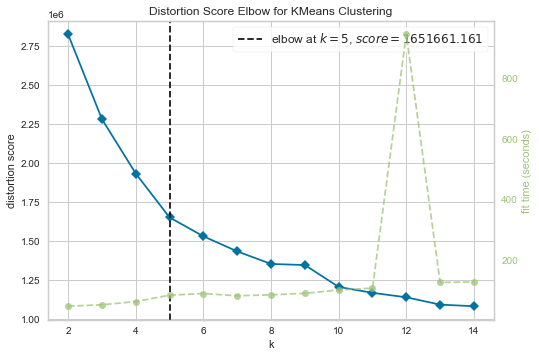

In [26]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer


# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,15))

visualizer.fit(X)        # Fit the data to the visualizer
# visualizer.show()        # Finalize and render the figure
visualizer.show(outpath="/Variant Classification/kMeans/kelbow_minibatchkmeans.pdf")

In [ ]:
import pandas as pd
import numpy as np
import time
from sklearn.svm import SVC
#import RandomBinningFeatures
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import RidgeClassifier
from sklearn import metrics
import scipy
import matplotlib.pyplot as plt 
# import cs
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.decomposition import TruncatedSVD
import random
import os.path as path
import os
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score


# from matplotlib import rc
# # for Arial typefont
# matplotlib.rcParams['font.family'] = 'Arial'

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn import svm

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

import pandas as pd
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler  
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import classification_report, confusion_matrix 

from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from pandas import DataFrame

from sklearn.model_selection import KFold 
from sklearn.model_selection import RepeatedKFold

from sklearn.metrics import confusion_matrix

from numpy import mean
#import seaborn as sns

import numpy
import matplotlib.pyplot as plt
import pandas
import math
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
#for clustering, the input data is in variable X_features_test
from sklearn.cluster import KMeans


print("Packages Loaded!!!")

In [ ]:

clust_num = 5
print("Number of Clusters = ",clust_num)

start_time = time.time()
kmeans = KMeans(n_clusters=clust_num, random_state=0).fit(X)
kmean_clust_labels = kmeans.labels_

np.save('/Variant Classification/kMeans/new_Labels_kmeans.npy', kmean_clust_labels)


end_time = time.time() - start_time
print("Clustering Time in seconds =>",end_time)